## **Overview**
This project predicts wine quality using machine learning models. By analyzing features like acidity, sugar, and alcohol content, we aim to classify wines as high or low quality.

### **Models Used**
- Random Forest Classifier
- Logistic Regression
- Support Vector Machines (SVM)

### **Results**
The best-performing model achieved an accuracy of 84%, providing insights into key factors influencing wine quality.

### **Data Loading**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving WineQT.csv to WineQT.csv


### **Import Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
raw_data = pd.read_csv("WineQT.csv")
raw_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
df = raw_data.copy()

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


### **EDA**

In [6]:
df = df.drop(['Id'],axis = 1)

In [7]:
from imblearn.over_sampling import SMOTE
x= df.drop(['quality'],axis=1)
y= df['quality']

In [8]:
smote = SMOTE(random_state=42, k_neighbors=1)
x_sampled , y_sampled = smote.fit_resample(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [9]:
df_sampled = pd.DataFrame(x_sampled, columns=x.columns)

In [10]:
df = pd.concat([df_sampled,y_sampled],axis=1)

In [11]:
df['quality'].value_counts()

,count
quality,
5,483
6,483
7,483
4,483
8,483
3,483


In [12]:
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
523,7.000000,0.450000,0.340000,2.700000,0.082000,16.000000,72.000000,0.998000,3.550000,0.600000,9.500000,5
2649,7.258983,0.374102,0.307051,1.941017,0.061308,15.589831,27.525422,0.994564,3.232949,0.742305,11.329492,8
2122,9.589131,0.372034,0.331755,2.037888,0.071716,9.364906,28.000000,0.996603,3.272842,0.771615,11.200000,7
2653,9.323895,0.325368,0.544779,2.546318,0.077717,6.253682,16.746318,0.995948,3.165221,0.861653,11.902946,8
1203,9.120925,0.810612,0.308317,2.142347,0.066505,15.765291,48.153058,0.998638,3.284592,0.558469,9.403570,3


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2898 entries, 0 to 2897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         2898 non-null   float64
 1   volatile acidity      2898 non-null   float64
 2   citric acid           2898 non-null   float64
 3   residual sugar        2898 non-null   float64
 4   chlorides             2898 non-null   float64
 5   free sulfur dioxide   2898 non-null   float64
 6   total sulfur dioxide  2898 non-null   float64
 7   density               2898 non-null   float64
 8   pH                    2898 non-null   float64
 9   sulphates             2898 non-null   float64
 10  alcohol               2898 non-null   float64
 11  quality               2898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 271.8 KB


In [14]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.00000
mean,8.293442,0.578666,0.274001,2.494949,0.084959,13.542353,38.532563,0.996521,3.320087,0.668800,10.627873,5.50000
std,1.629408,0.240250,0.201891,1.159326,0.045543,9.378212,32.095005,0.001883,0.153148,0.167934,1.143119,1.70812
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.00000
25%,7.180899,0.379534,0.080000,1.903093,0.067591,6.000000,16.000000,0.995340,3.214170,0.560000,9.643230,4.00000
50%,7.928670,0.546356,0.280000,2.147529,0.075425,11.332406,29.000000,0.996484,3.302225,0.630000,10.487389,5.50000
75%,9.191196,0.720000,0.437552,2.600000,0.087525,17.318256,48.636697,0.997600,3.420000,0.752870,11.368599,7.00000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.00000


In [15]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [16]:
df.duplicated().sum()

292

In [17]:

df.drop_duplicates(inplace = True)

In [18]:
df.duplicated().sum()

0

<Axes: xlabel='quality'>

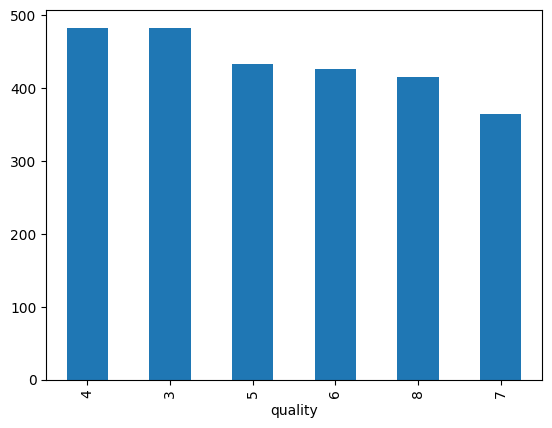

In [19]:
df["quality"].value_counts().plot(kind='bar')

In [20]:
X = df.drop('quality',axis=1)
y = df['quality']

In [21]:
y.value_counts()

,count
quality,
4,483
3,483
5,433
6,426
8,416
7,365


## **Outlier**

In [22]:
import seaborn as sns

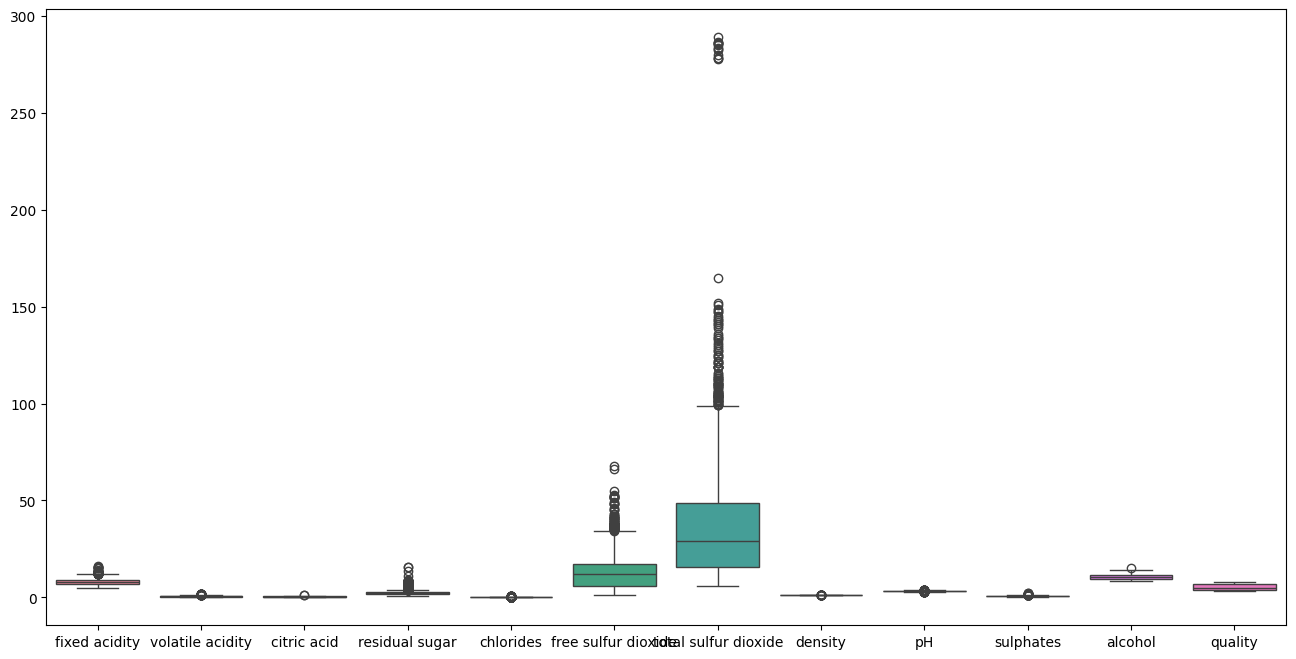

In [23]:
plt.subplots(figsize = (16,8))
sns.boxplot(df)
plt.show()

In [24]:
x = df.drop('quality',axis = 1)

df_col = x.columns

In [25]:
df_col

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [26]:
def Outlier(df,df_col):
  for col in df_col:
    Q1 = df[col].quantile(.25)
    Q3 = df[col].quantile(.75)

    IQR = Q3-Q1

    lower_limit = Q1-1.5*IQR
    upper_limit = Q3+1.5*IQR

    df = df[(df[col] <= upper_limit) & (df[col]>=lower_limit)]

  return df




In [27]:
df = Outlier(df,df_col)

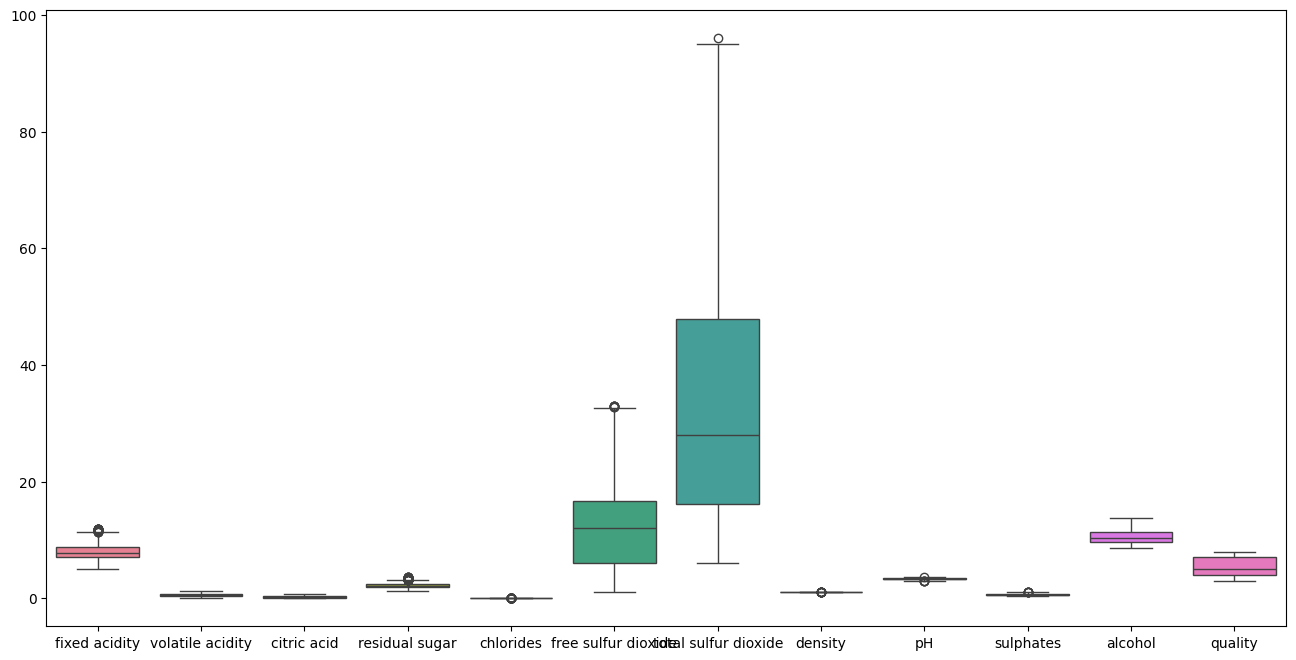

In [28]:
plt.subplots(figsize = (16,8))
sns.boxplot(df)
plt.show()

In [29]:
def percentile(df,df_col):
  for col in df_col:
    lower_limit = df[col].quantile(0.01)
    upper_limit = df[col].quantile(0.99)

    df = df[(df[col]>= lower_limit) & (df[col]<= upper_limit)]
  return df


In [30]:
df = percentile(df,df_col)

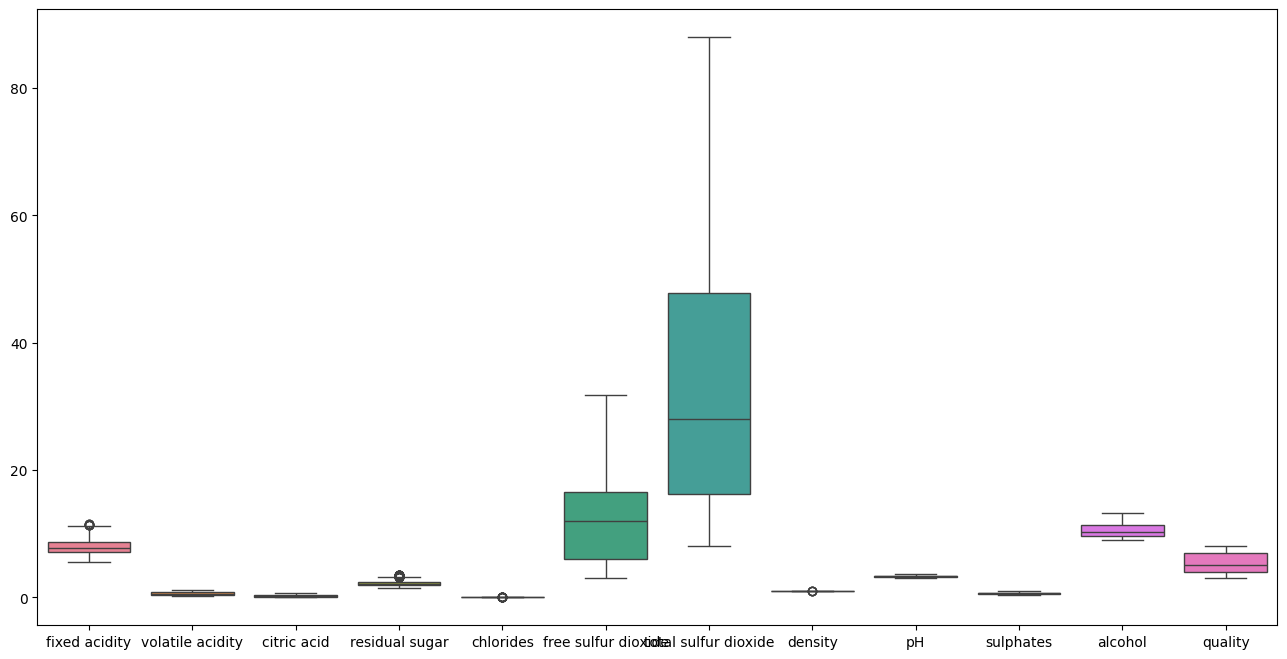

In [31]:
plt.figure(figsize = (16,8))
sns.boxplot(df)
plt.show()

## **Data Distribution**

In [32]:
df = pd.DataFrame(df,columns= df.columns)

Skew of fixed acidity :  0.5377574594829815
Skew of volatile acidity :  0.4350227516060442
Skew of citric acid :  0.1741058042262201
Skew of residual sugar :  0.9435137411916679
Skew of chlorides :  0.6204446394135614
Skew of free sulfur dioxide :  0.6997150839438151
Skew of total sulfur dioxide :  0.8765454025179468
Skew of density :  0.1646502696512976
Skew of pH :  0.4219683161264075
Skew of sulphates :  0.616285318086264
Skew of alcohol :  0.5445045221273908


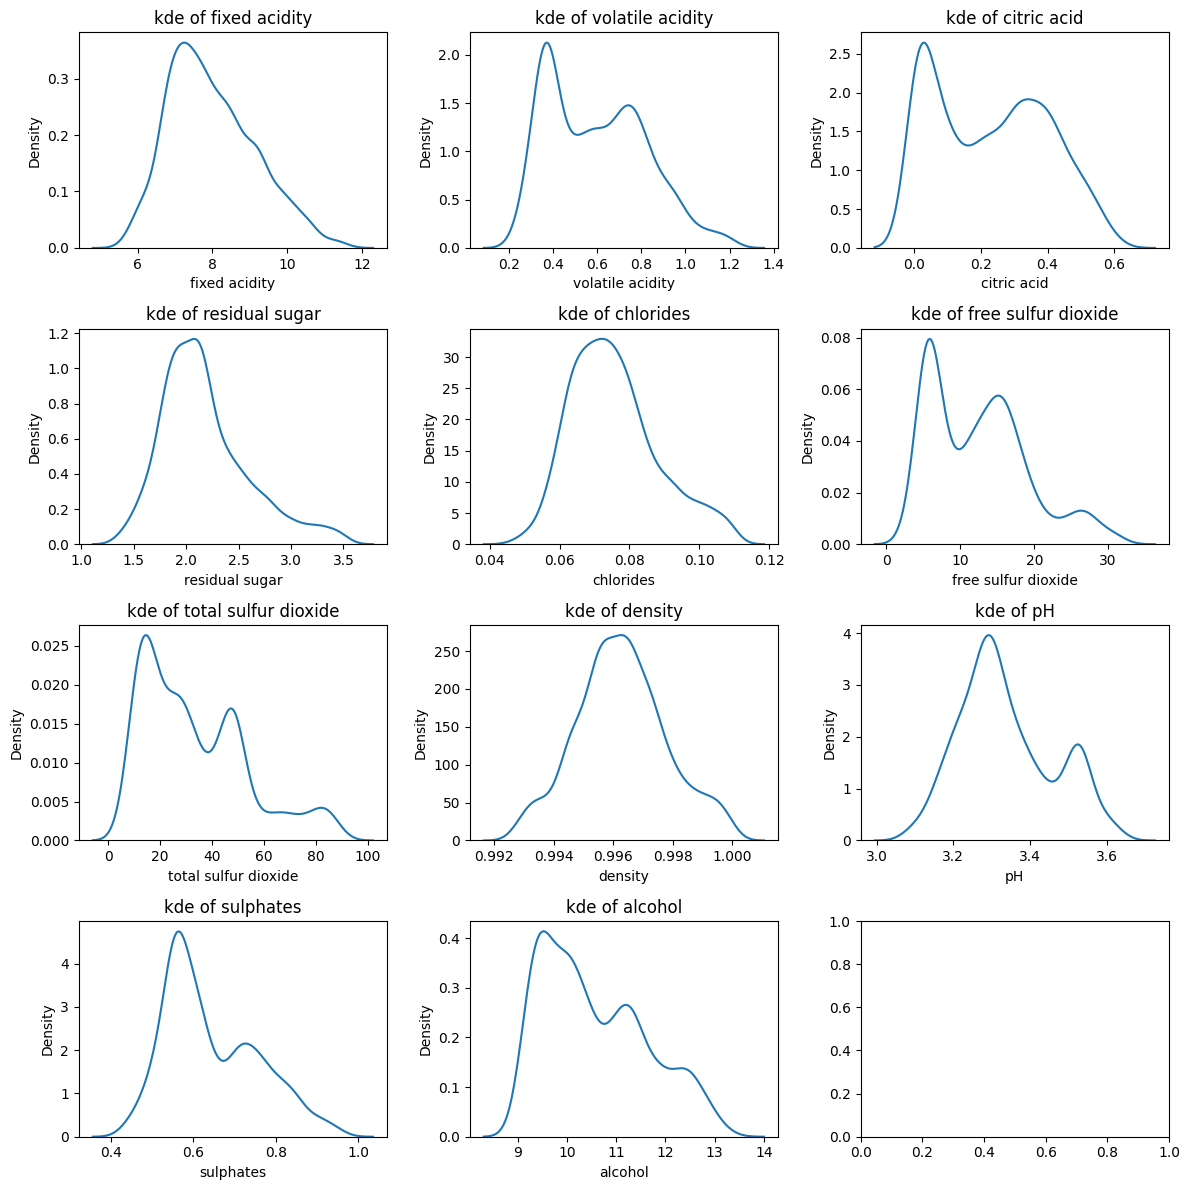

In [33]:
fig,ax = plt.subplots(nrows = 4,ncols = 3, figsize= (12,12))
ax = ax.flatten()

for i ,col in enumerate(df_col):
  print(f"Skew of {col} : ",df[col].skew())
  sns.kdeplot(df[col],ax = ax[i])
  ax[i].set_title(f"kde of {col}")

plt.tight_layout()
plt.show()

In [34]:
!pip install  scipy

In [35]:
from scipy.stats import boxcox

In [36]:
df['alcohol'], lambda_boxcox = boxcox(df['alcohol'])

In [37]:
df_col

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [38]:
df['fixed acidity'], lambda_boxcox = boxcox(df['fixed acidity'])

In [39]:
df['volatile acidity'], lambda_boxcox = boxcox(df['volatile acidity'])

In [40]:
df['citric acid'] = df['citric acid']+1

In [41]:
df['citric acid'], lambda_boxcox = boxcox(df['citric acid'])

In [42]:
df['residual sugar'], lambda_boxcox = boxcox(df['residual sugar'])

In [43]:
df['chlorides'], lambda_boxcox = boxcox(df['chlorides'])

In [44]:

df['free sulfur dioxide'], lambda_boxcox = boxcox(df['free sulfur dioxide'])

In [45]:
df['total sulfur dioxide'], lambda_boxcox = boxcox(df['total sulfur dioxide'])

In [46]:
df['density'], lambda_boxcox = boxcox(df['density'])

In [47]:
df['sulphates'], lambda_boxcox = boxcox(df['sulphates'])

In [48]:
#from sklearn.preprocessing import PowerTransformer
#pt  = PowerTransformer(method='yeo-johnson')
#df['alcohol'] = pt.fit_transform(df[['alcohol']])

df['alcohol']  = np.log(df['alcohol'])

In [49]:
df['pH'], lambda_boxcox = boxcox(df['pH'])

Skew of fixed acidity :  0.019067381283834804
Skew of volatile acidity :  -0.021283294878165722
Skew of citric acid :  0.008718128574392555
Skew of residual sugar :  0.007374995985371537
Skew of chlorides :  0.008603894958617653
Skew of free sulfur dioxide :  -0.029721468442757002
Skew of total sulfur dioxide :  -0.007738026046822059
Skew of density :  0.003989156033596156
Skew of pH :  0.03782475181010501
Skew of sulphates :  0.0427002374836622
Skew of alcohol :  0.09563375718705258


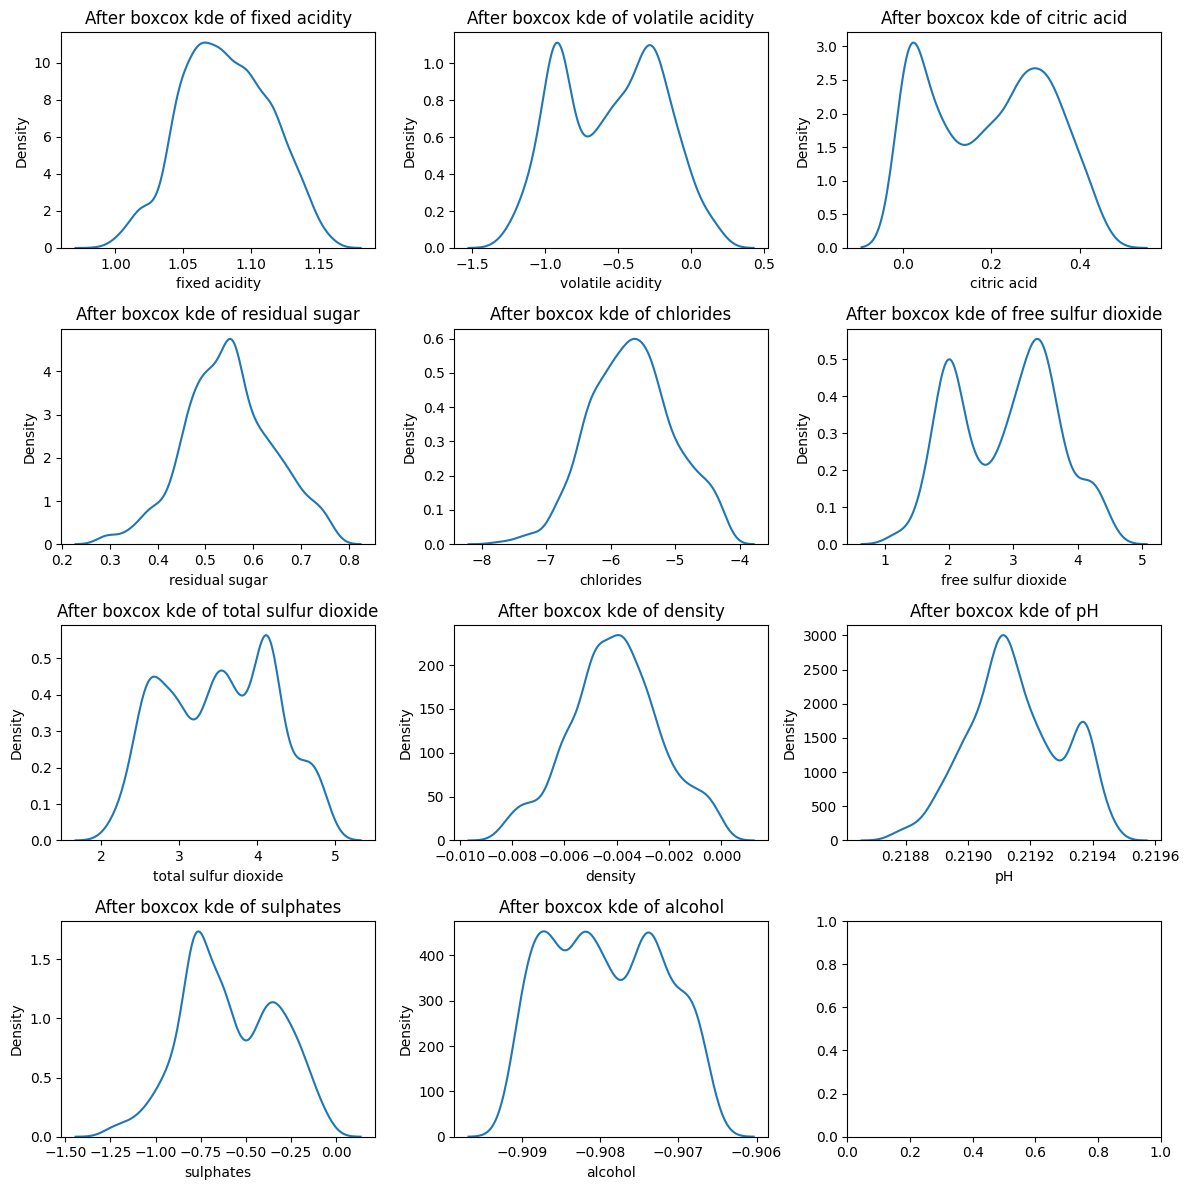

In [50]:
fig,ax = plt.subplots(nrows = 4,ncols = 3, figsize= (12,12))
ax = ax.flatten()

for i ,col in enumerate(df_col):
  print(f"Skew of {col} : ",df[col].skew())
  sns.kdeplot(df[col],ax = ax[i])
  ax[i].set_title(f"After boxcox kde of {col}")

plt.tight_layout()
plt.show()

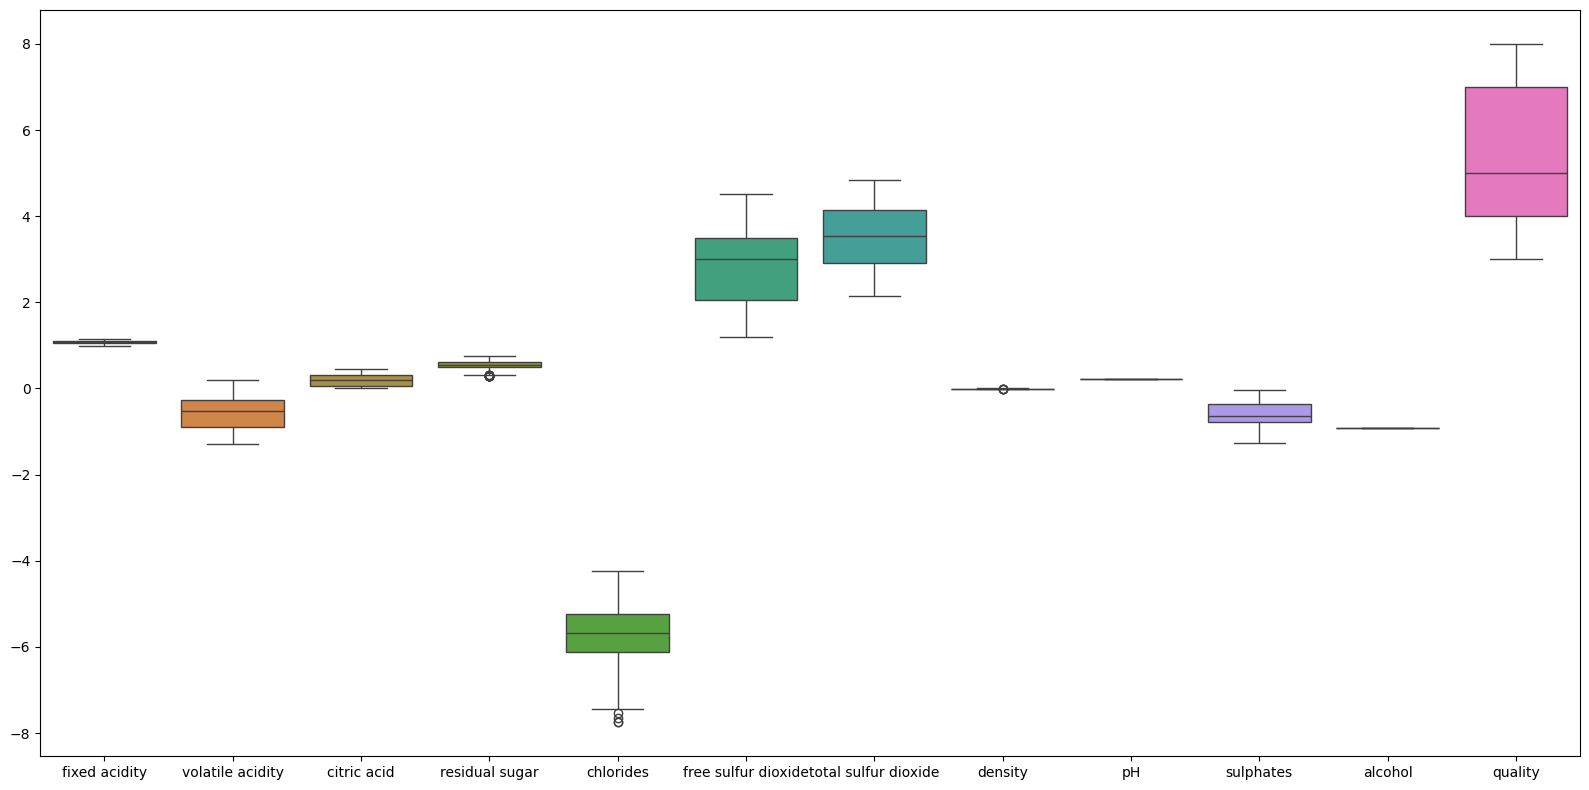

In [51]:

plt.figure(figsize = (16,8))
sns.boxplot(df)
plt.tight_layout()
plt.show()

In [52]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1.067243,-0.347303,0.000000,0.491421,-5.565938,2.882692,3.747760,-0.002298,0.219357,-0.769733,-0.908791,5
1,1.079685,-0.126616,0.000000,0.648123,-4.618351,4.131524,4.521958,-0.003411,0.218974,-0.464380,-0.908405,5
2,1.079685,-0.268866,0.039112,0.591920,-4.841901,3.336606,4.273815,-0.003185,0.219065,-0.530479,-0.908405,5
3,1.153674,-1.158826,0.431002,0.491421,-5.618939,3.525813,4.394789,-0.002081,0.218909,-0.710362,-0.908405,6
5,1.067243,-0.402833,0.000000,0.459804,-5.618939,3.124567,3.931615,-0.002298,0.219357,-0.769733,-0.908791,5


In [53]:
X = df.drop('quality',axis=1)
y = df['quality']

In [55]:
print(X.shape)
print(y.shape)
print(X.head())
print(y.head())

(1526, 11)
(1526,)
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       1.067243         -0.347303     0.000000        0.491421  -5.565938   
1       1.079685         -0.126616     0.000000        0.648123  -4.618351   
2       1.079685         -0.268866     0.039112        0.591920  -4.841901   
3       1.153674         -1.158826     0.431002        0.491421  -5.618939   
5       1.067243         -0.402833     0.000000        0.459804  -5.618939   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             2.882692              3.747760 -0.002298  0.219357  -0.769733   
1             4.131524              4.521958 -0.003411  0.218974  -0.464380   
2             3.336606              4.273815 -0.003185  0.219065  -0.530479   
3             3.525813              4.394789 -0.002081  0.218909  -0.710362   
5             3.124567              3.931615 -0.002298  0.219357  -0.769733   

    alcohol  
0 -0.908791  
1 -0.9084

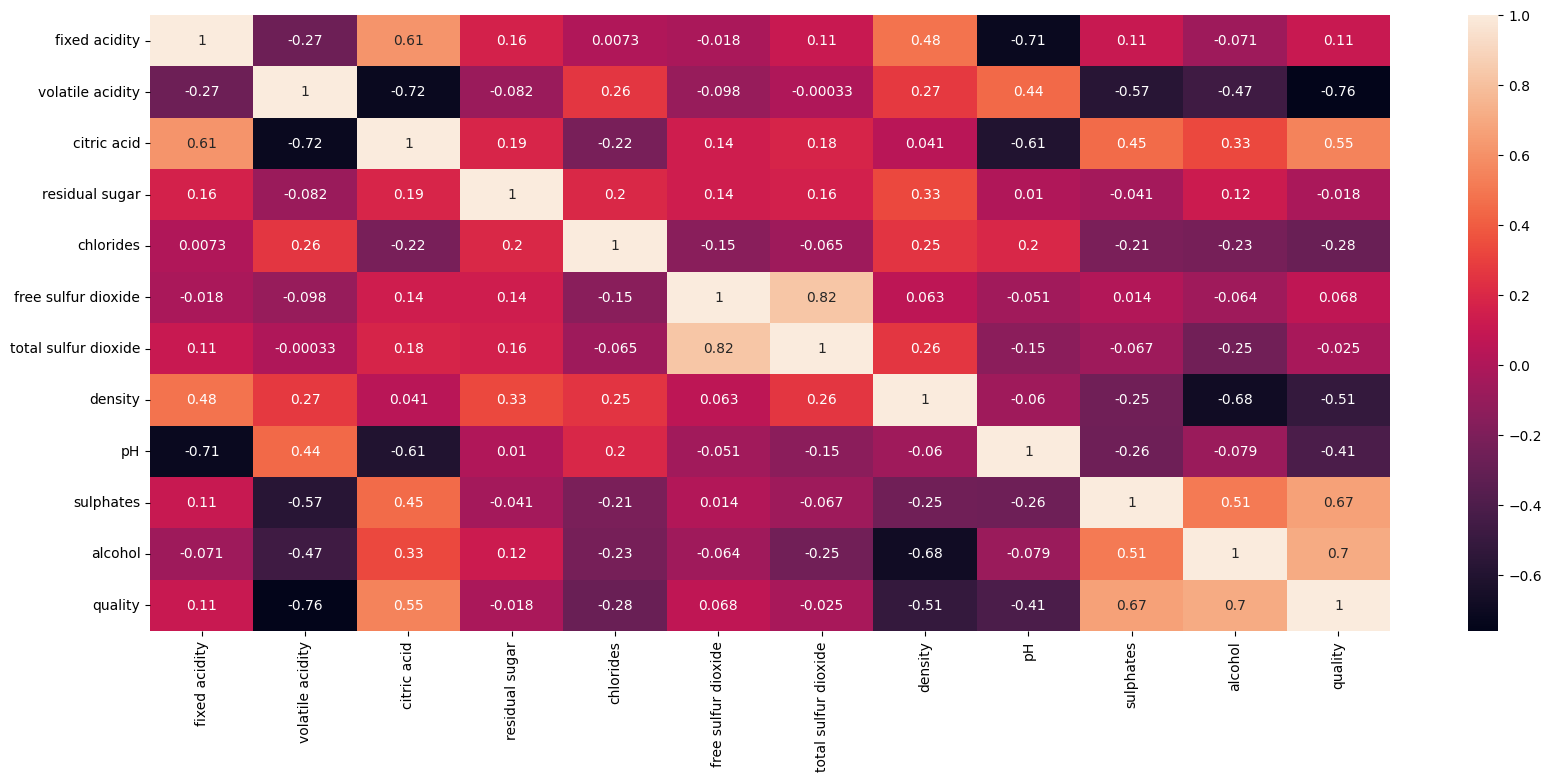

In [56]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [57]:

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [58]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
472,1.120215,-0.507296,0.129823,0.520069,-5.177405,4.131524,4.139091,-0.001973,0.218874,-0.769733,-0.908496
1507,1.049219,-0.079009,0.015865,0.479110,-4.930752,2.009922,2.537872,-0.004624,0.219385,-0.698639,-0.908117
2484,1.087933,-0.625860,0.304277,0.610454,-5.606930,2.411325,2.964892,-0.008459,0.218977,-0.393390,-0.906614
156,1.079685,-0.996056,0.307911,0.520069,-5.269055,4.065749,4.355816,-0.003868,0.219172,-0.682138,-0.908791
2745,1.079925,-0.565326,0.254515,0.406041,-6.278990,4.259953,4.741398,-0.007464,0.219077,-0.375823,-0.906856


In [59]:
X_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
2758,1.065968,-0.937978,0.259004,0.472515,-5.872128,3.490471,3.401563,-0.006401,0.219033,-0.400407,-0.907305
149,1.085505,-0.313952,0.211875,0.679291,-5.222806,2.747370,4.432527,-0.003354,0.219184,-0.769733,-0.908231
1902,1.037837,-0.172264,0.080131,0.697127,-4.963223,3.529201,3.665548,-0.003632,0.219359,-0.630347,-0.907520
1366,1.137761,-0.343098,0.376415,0.562887,-5.901255,3.133315,4.129913,-0.000357,0.219077,-0.758004,-0.908990
2119,1.090618,-1.132491,0.312773,0.507977,-7.299901,1.667614,2.395652,-0.006767,0.219079,-0.562800,-0.907032


In [60]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X_train = pd.DataFrame(st.fit_transform(X_train))
X_test = pd.DataFrame(st.fit_transform(X_test))


In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc = SVC(C = 0.1,kernel = 'rbf')
svc.fit(X_train,y_train)

SVC(C=0.1)

In [62]:
y_pred = svc.predict(X_test)

print(accuracy_score(y_pred,y_test))

0.6699346405228758


In [71]:
rfc = RandomForestClassifier(n_estimators = 200, max_depth= 9, bootstrap= False)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
print(accuracy_score(y_pred,y_test))

0.8431372549019608


In [75]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver = 'lbfgs',C= 10)

In [76]:
lr.fit(X_train,y_train)

LogisticRegression(C=10)

In [77]:
y_pred = lr.predict(X_test)

In [78]:
print(accuracy_score(y_pred,y_test))

0.6993464052287581


In [67]:
import optuna

ModuleNotFoundError: No module named 'optuna'

In [ ]:
### For hyperparameter tuning

In [ ]:
! pip install optuna

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

svc = SVC()
xgb = XGBRegressor()
rdf = RandomForestRegressor



def objective(trial):
  regression = trial.suggest_categorical('regression',['xgb','svc','rdf'])

  if regression == 'xgb':
    max_depth = trial.suggest_int('max_depth',1,5)
    max_child_weight = trial.suggest_int('min_child_weight',1,10)
    eta = trial.suggest_float('eta', 0.01,0.1,log = True)

    model = XGBRegressor(max_depth = max_depth,
                         max_child_weight = max_child_weight,
                         eta = eta,
                         objective = 'reg:squarederror')

  elif(regression == 'svc'):
    C = trial.suggest_float('C',0.1,1)
    kernel = trial.suggest_categorical('kernel',['rbf','poly','linear'])

    model = SVC(kernel = kernel,
                C= C
                )
  else:
    max_depth = trial.suggest_int('max_depth',1,5)
    n_estimator = trial.suggest_int('n_estimator',50,200)
    bootstrap = trial.suggest_categorical('bootstrap',[True,False])

    model = RandomForestRegressor(
        max_depth = max_depth,
        n_estimators = n_estimator,
        bootstrap = bootstrap
    )
  score = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=3).mean()
  return score


In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from xgboost import XGBRegressor
import optuna

svc = SVC()
xgb = XGBRegressor()
rdf = RandomForestRegressor()

def objective(trial):
    regression = trial.suggest_categorical('regression', ['xgb', 'svc', 'rdf'])

    if regression == 'xgb':
        max_depth = trial.suggest_int('max_depth', 1, 5)
        min_child_weight = trial.suggest_int('min_child_weight', 1, 10)
        eta = trial.suggest_loguniform('eta', 0.01, 0.1)
        model = XGBRegressor(max_depth=max_depth,
                             min_child_weight=min_child_weight,
                             eta=eta,
                             objective='reg:squarederror')
    elif regression == 'svc':
        C = trial.suggest_float('C', 0.1, 1)
        kernel = trial.suggest_categorical('kernel', ['rbf', 'poly', 'linear'])
        model = SVC(kernel=kernel, C=C)
    else:
        max_depth = trial.suggest_int('max_depth', 1, 5)
        n_estimators = trial.suggest_int('n_estimators', 50, 200)
        bootstrap = trial.suggest_categorical('bootstrap', [True, False])
        model = RandomForestRegressor(max_depth=max_depth,
                                      n_estimators=n_estimators,
                                      bootstrap=bootstrap)

    return model

# Example usage
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)


In [ ]:
import seaborn as sns

In [ ]:
sns.pairplot(df,hue = 'quality')
plt.show()